# BLACK FRIDAY PROJECT
# Name: SHRESTHA PREETY
# MAC 270
#Python Notebook

#Submitted to :prof. khalid kassou



BACKGROUND: 
GOAL: we are trying to predict the prices for the products to be sold during black friday. Store can get the better information for the behaviur of customer purchasing different products and how much they can spend. We gonna check the dependent variables and independent variables. 

In the dataset, we have categorical variables and this data set can be convenient for clustering and finding different clusters of consumers.

METHODS APPLIED:  

Regression Analysis

Feature Engineering

Feature Selection

Feature Extraction

Final Model

and Data analysis - Data Visualizations.

NOTE: We have applied different model and we are going to check that which model will give us best result.


In [1]:
# First we are importing necessary
# Initializing Packages and Importing Data

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("BlackFriday.csv") # data is our data frame

In [3]:
data.shape # we have 537577 rows and 12 columns

(537577, 12)

In [4]:
# Taking a peak at our data
data.sample(10)  # showing the inital 10 samples in table

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
446302,1002765,P00208342,M,51-55,7,C,1,1,1,16.0,NaN,11970
9059,1001387,P00086142,F,51-55,13,B,1,1,5,NaN,NaN,5226
146909,1004640,P00016842,M,26-35,4,B,0,1,1,2.0,15.0,7725
385907,1005397,P00270942,M,18-25,0,B,2,1,1,2.0,15.0,11804
416807,1004107,P00221442,F,26-35,0,B,1,0,1,2.0,5.0,15601
516232,1001501,P00290542,M,26-35,11,A,3,0,5,NaN,NaN,5307
477213,1001489,P00234842,F,36-45,2,A,2,1,5,6.0,16.0,1821
305173,1005005,P00075542,M,46-50,16,B,2,0,8,13.0,NaN,6004
216580,1003464,P00145942,F,26-35,14,B,4+,1,6,8.0,13.0,16297
509957,1000567,P00331042,M,36-45,20,C,3,0,5,8.0,NaN,7165


In [5]:
# This code provides information about the data. It tells about the int, object, boolean and float type for each variables

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [6]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [7]:
# checking the datatypes of attributes of dataset

data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [8]:
# Our data may have lot of NULL values so let's check using below code.
# checking if there is any NULL values present in the dataset

data.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [9]:
data['Gender'].value_counts()  # counting number of males and females

M    405380
F    132197
Name: Gender, dtype: int64

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


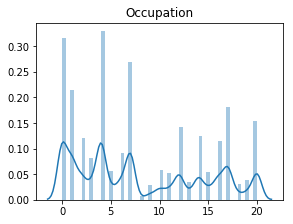

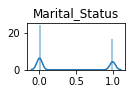

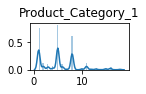

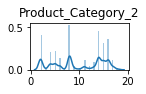

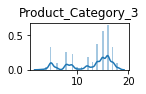

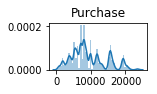

In [10]:
feature_selected = ['Occupation','Marital_Status',
       'Product_Category_1', 'Product_Category_2', 'Product_Category_3',
       'Purchase']

plt.figure(figsize=(15,15))
for i in range(len(feature_selected)):
    feature_this = data[feature_selected[i]]
    feature_this = feature_this.dropna()
    plt.subplot(4,3,i+1)
    plt.title(feature_selected[i])
    sns.distplot(feature_this)
    plt.xlabel('')
    plt.show()


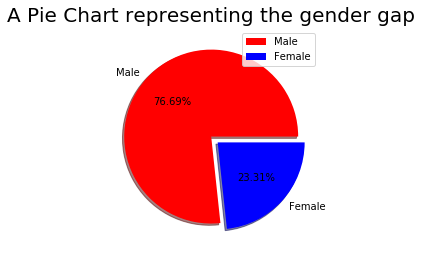

In [11]:
# let's graph our data in pie chart 

size = [405380, 123197]
labels = ['Male', 'Female']
colors = ['red', 'blue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

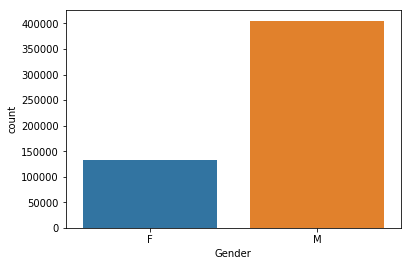

In [12]:
sns.countplot(data.Gender)  # BAR GRAPH

In [13]:
# finding the maximum purchase in both male and female


data.groupby(data.Gender).Purchase.max()

Gender
F    23959
M    23961
Name: Purchase, dtype: int64

In [14]:
# finding the minimum purchase in both male and female

data.groupby(data.Gender).Purchase.min()

Gender
F    185
M    185
Name: Purchase, dtype: int64

In [15]:
# checking dependency of gender on purchase

data[['Gender', 'Purchase']].groupby('Gender').mean()

,Purchase
Gender,
F,8809.761349
M,9504.771713


OBESERVATION: In average we see male makes purchase than female.

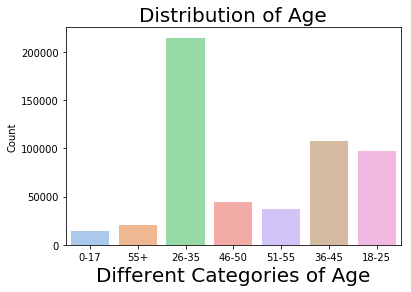

In [16]:
# Let's visualize the age of customers
# visualizing the age of customers

sns.countplot(data['Age'], palette = 'pastel')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Different Categories of Age', fontsize = 20)
plt.ylabel('Count')
plt.show()

OBSERVATION: The age between 26-25 makes more purchase than other age groups

In [17]:
# checking the dependency of age attribute with purchasing power

data[['Age', 'Purchase']].groupby('Age').mean()

,Purchase
Age,
0-17,9020.126878
18-25,9235.197575
26-35,9314.588970
36-45,9401.478758
46-50,9284.872277
51-55,9620.616620
55+,9453.898579


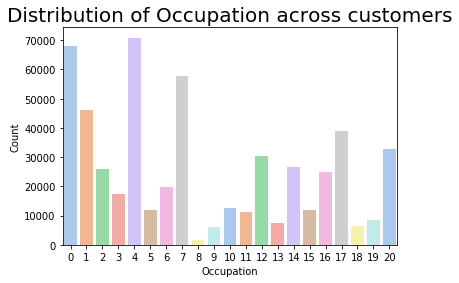

In [18]:
# visualizing the occupation of customers

sns.countplot(data['Occupation'], palette = 'pastel')
plt.title('Distribution of Occupation across customers', fontsize = 20)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

In [19]:
# checking the dependency of occupation on purchasing power

data[['Occupation', 'Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9186.946726
1,9017.703095
2,9025.938982
3,9238.077277
4,9279.026742
5,9388.848978
6,9336.378620
7,9502.175276
8,9576.508530


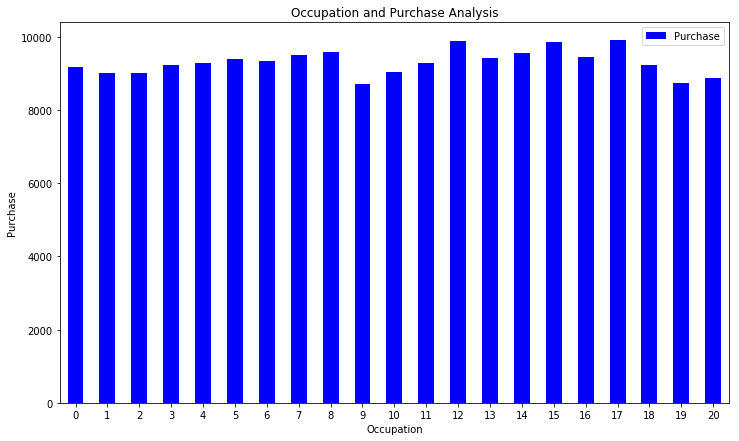

In [20]:
Occupation_pivot = \
data.pivot_table(index='Occupation', values="Purchase", aggfunc=np.mean)

Occupation_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Occupation")
plt.ylabel("Purchase")
plt.title("Occupation and Purchase Analysis")
plt.xticks(rotation=0)
plt.show()

# HISTOGRAM

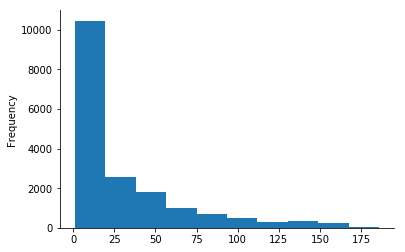

In [21]:
data.Purchase.value_counts().plot(kind='hist')
sns.despine()

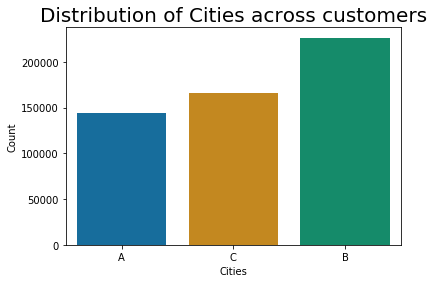

In [22]:
# visulaizing the cities the customers are from

sns.countplot(data['City_Category'], palette = 'colorblind')
plt.title('Distribution of Cities across customers', fontsize = 20)
plt.xlabel('Cities')
plt.ylabel('Count')
plt.show()

In [23]:
# checking the dependency of cities where custoer live with the purchasing power

data[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8958.011014
B,9198.657848
C,9844.441855


In [24]:
# we need to label the 4+ to 5 to visualize the stay of customers in a city
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].map({'0': 0, '1': 1, '2': 2, '3': 3, '4+': 4,})

data['Stay_In_Current_City_Years'].value_counts()

1    189192
2     99459
3     93312
4     82889
0     72725
Name: Stay_In_Current_City_Years, dtype: int64

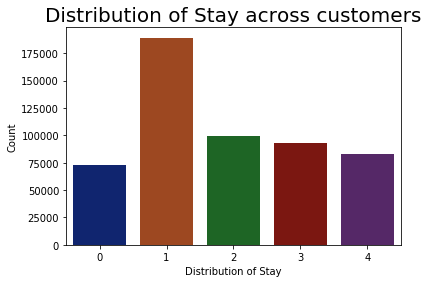

In [25]:
# visualizing the stay in current years


sns.countplot(data['Stay_In_Current_City_Years'], palette = 'dark')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

In [26]:
# checking the dependency of stay in purchasing power

data[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9247.238625
1,9319.865095
2,9397.607316
3,9350.685121
4,9346.370158


In [27]:
# visualizing the Marital Status

data['Marital_Status'].value_counts()


0    317817
1    219760
Name: Marital_Status, dtype: int64

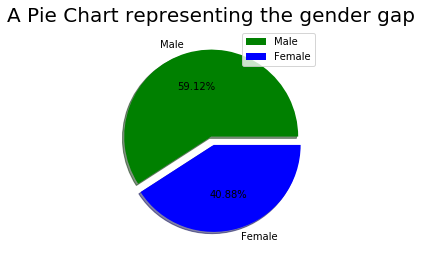

In [28]:
# pie chart 

size = [317817, 219760]
labels = ['Male', 'Female']
colors = ['green', 'blue']
explode = [0, 0.1]

plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('A Pie Chart representing the gender gap', fontsize = 20)
plt.legend()
plt.show()

In [29]:
# checking the dependency of marital status on purchasing power

data[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9333.325467
1,9334.632681


# PURCHASE AMOUNT DISTRIBUTION

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Purchase amount Distribution')

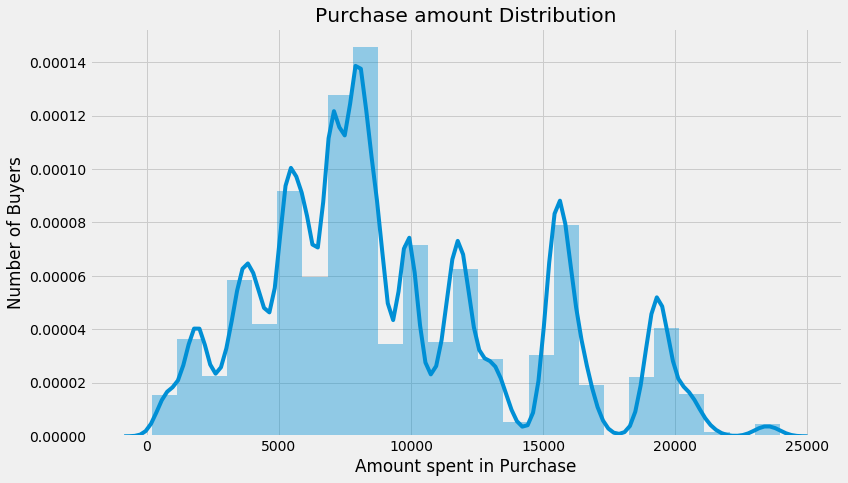

In [30]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Purchase, bins = 25)
plt.xlabel("Amount spent in Purchase")
plt.ylabel("Number of Buyers")
plt.title("Purchase amount Distribution")

In [31]:
print ("Skew is:", data.Purchase.skew())
print("Kurtosis: %f" % data.Purchase.kurt())

Skew is: 0.6242797316083074
Kurtosis: -0.343121


In [32]:
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.dtypes

User_ID                         int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [33]:

corr = numeric_features.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')
print (corr['Purchase'].sort_values(ascending=False)[-10:])

Purchase                      1.000000
Occupation                    0.021104
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64 

Purchase                      1.000000
Occupation                    0.021104
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Product_Category_3           -0.022257
Product_Category_2           -0.209973
Product_Category_1           -0.314125
Name: Purchase, dtype: float64


# CORRELATION

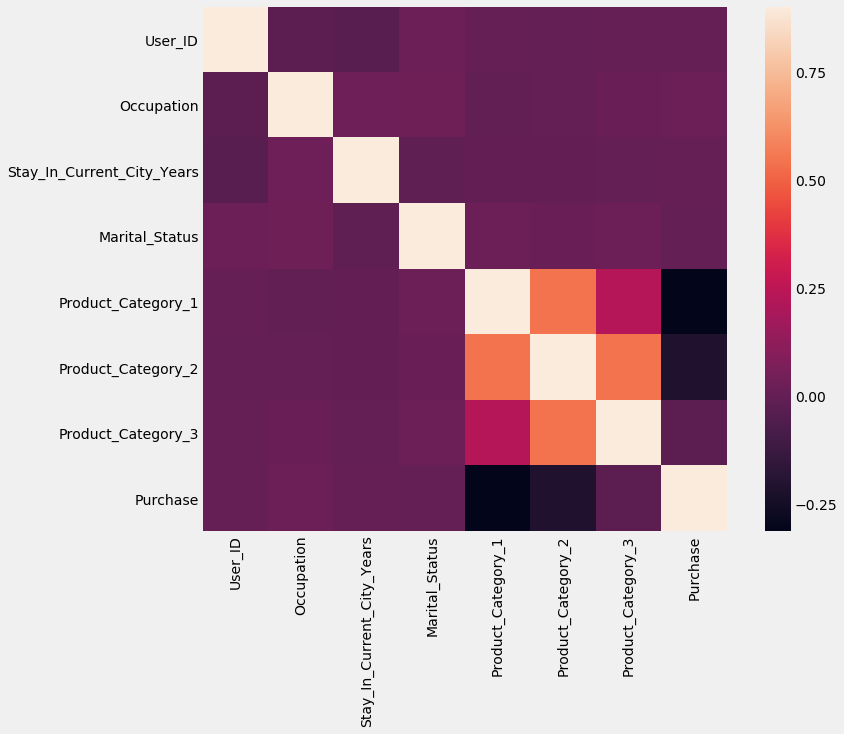

In [34]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.9, square=True);

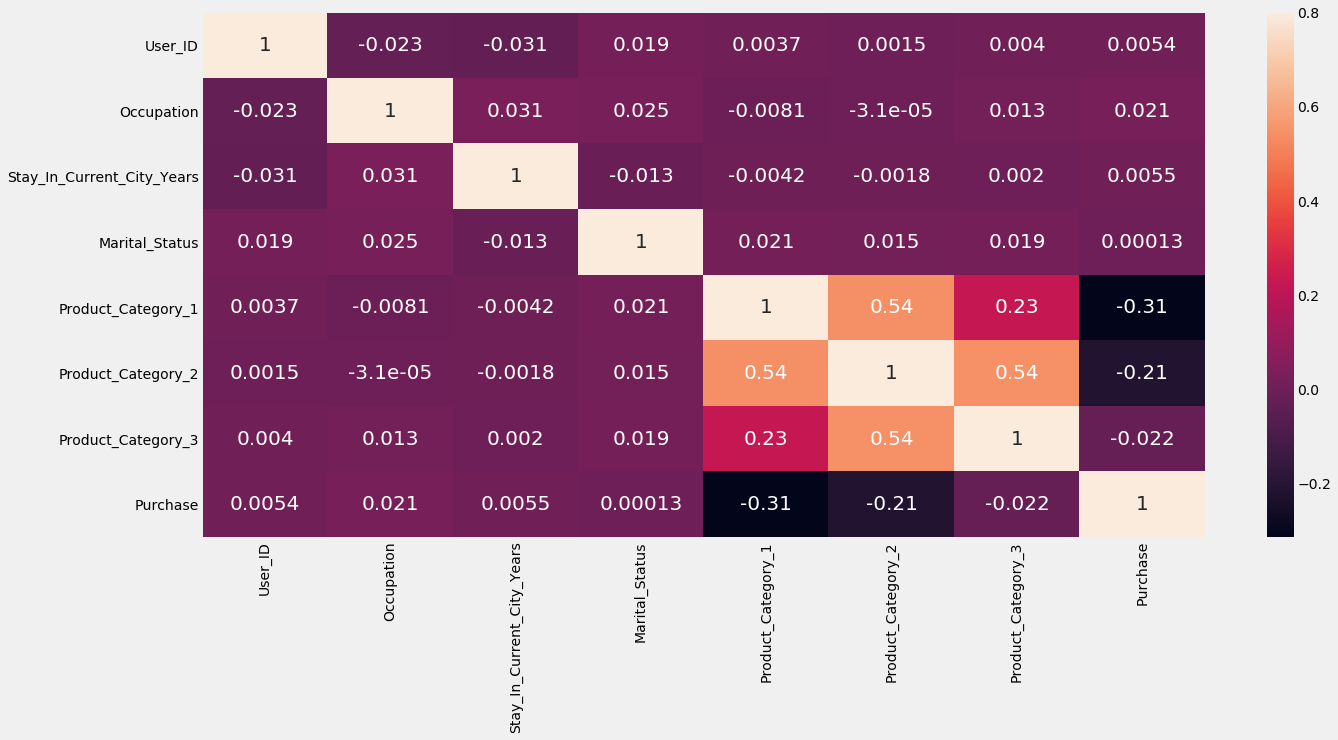

In [35]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True);

In [36]:
#Correlations Between Attributes
#Pearson’s Correlation
#Coefficient, that assumes a normal distribution of the attributes involved"""

s = corr.unstack()
#s.sort_values(kind="quicksort")
s

User_ID                     User_ID                       1.000000
                            Occupation                   -0.023024
                            Stay_In_Current_City_Years   -0.030655
                            Marital_Status                0.018732
                            Product_Category_1            0.003687
                            Product_Category_2            0.001471
                            Product_Category_3            0.004045
                            Purchase                      0.005389
Occupation                  User_ID                      -0.023024
                            Occupation                    1.000000
                            Stay_In_Current_City_Years    0.031203
                            Marital_Status                0.024691
                            Product_Category_1           -0.008114
                            Product_Category_2           -0.000031
                            Product_Category_3            0.01

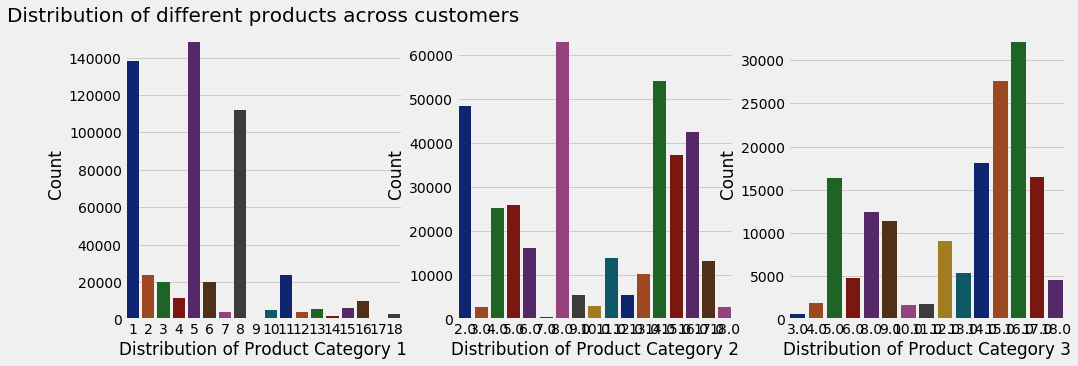

In [37]:
# visualizing the product category 1

plt.rcParams['figure.figsize'] = (15, 5)

plt.subplot(131)
sns.countplot(data['Product_Category_1'], palette = 'dark')
plt.title('Distribution of different products across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 1')
plt.ylabel('Count')

plt.subplot(132)
sns.countplot(data['Product_Category_2'], palette = 'dark')
#plt.title('Distribution of product category 2 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(data['Product_Category_3'], palette = 'dark')
#plt.title('Distribution of product category 3 across customers', fontsize = 20)
plt.xlabel('Distribution of Product Category 3')
plt.ylabel('Count')


plt.show()

In [38]:
# checking the dependency of product 1 on purchasing power

data[['Product_Category_1', 'Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13607.701495
2,11255.680752
3,10096.841705
4,2328.862886
5,6238.004045
6,15837.893573
7,16373.830153
8,7497.354850
9,15538.297030


In [39]:
# checking the dependency of product 1 on purchasing power

data[['Product_Category_2', 'Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.0,13621.740682
3.0,11229.532628
4.0,10218.319009
5.0,9034.054649
6.0,11500.585872
7.0,6877.234146
8.0,10278.036363
9.0,7282.593633
10.0,15656.014711


In [40]:
# checking the dependency of product 1 on purchasing power

data[['Product_Category_3', 'Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.0,13957.166667
4.0,9778.290761
5.0,12128.351770
6.0,13189.812785
8.0,13029.554102
9.0,10429.594533
10.0,13522.985866
11.0,12112.626622
12.0,8718.752144


# TARGET VARIABLE

The mu 9333.859852635065 and Sigma 4981.017499809046 for the curve


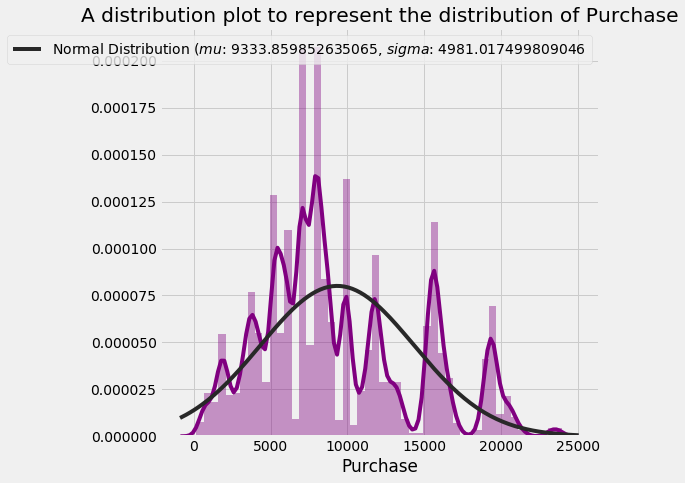

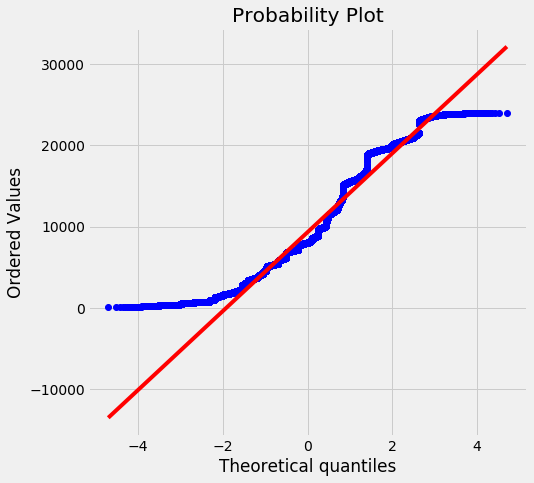

In [41]:
# visualizing the purchase attribute which is our target variable

# importing important libraries
from scipy import stats
from scipy.stats import norm

# plotting a distribution plot for the target variable
plt.rcParams['figure.figsize'] = (7, 7)
sns.distplot(data['Purchase'], color = 'purple', fit = norm)

# fitting the target variable to the normal curve 
mu, sigma = norm.fit(data['Purchase']) 
print("The mu {} and Sigma {} for the curve".format(mu, sigma))

plt.title('A distribution plot to represent the distribution of Purchase')
plt.legend(['Normal Distribution ($mu$: {}, $sigma$: {}'.format(mu, sigma)], loc = 'best')
plt.show()

# plotting the QQplot
stats.probplot(data['Purchase'], plot = plt)
plt.show()

In [42]:
# looking at the columns of the dataset

data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [43]:
# removing unwanted columns

# saving the attributes User_ID and Product_ID before deleting them
User_ID = data['User_ID']
Product_ID = data['Product_ID']

data = data.drop(['User_ID', 'Product_ID'], axis = 1)

# checking the new shape of data
data.shape

(537577, 10)

In [44]:
# filling the missing values

data['Product_Category_2'].fillna(0, inplace = True)
data['Product_Category_3'].fillna(0, inplace = True)

data.isnull().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [45]:
# making dummies of variables
# performing one hot encoding


data = pd.get_dummies(data)

# checking the shape of new dataset
data.shape

(537577, 19)

In [46]:
data.head()

,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,Age_51-55,Age_55+,City_Category_A,City_Category_B,City_Category_C
0,10,2,0,3,0.0,0.0,8370,1,0,1,0,0,0,0,0,0,1,0,0
1,10,2,0,1,6.0,14.0,15200,1,0,1,0,0,0,0,0,0,1,0,0
2,10,2,0,12,0.0,0.0,1422,1,0,1,0,0,0,0,0,0,1,0,0
3,10,2,0,12,14.0,0.0,1057,1,0,1,0,0,0,0,0,0,1,0,0
4,16,4,0,8,0.0,0.0,7969,0,1,0,0,0,0,0,0,1,0,0,1


# DEPENDENT AND INDEPENDENT VARIABLE

In [47]:
# splitting the data into dependent and independents sets

y = data['Purchase']

# now removing the purchase column from the dataset
data = data.drop(['Purchase'], axis = 1)

x = data

# checking the shapes of x and y
print("Shape of x: ", x.shape)
print("Shape of y: ", y.shape)

Shape of x:  (537577, 18)
Shape of y:  (537577,)


In [48]:
# splitting into training and testing

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 15)

print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ",y_test.shape)

Shape of x_train:  (376303, 18)
Shape of x_test:  (161274, 18)
Shape of y_train:  (376303,)
Shape of y_test:  (161274,)


# standardization

# Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. 

In [49]:


from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [50]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Ridge()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4626.681093165721
R2 Score: 0.13771549779099967


In [51]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4653.7714962387545
R2 Score: 0.12758814188315237


In [52]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = Lasso()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4626.692739073761
R2 Score: 0.1377111568396987


In [53]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = ElasticNet()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 4653.7714962387545
R2 Score: 0.12758814188315237


In [54]:
# predictive analytics
# regression analysis
# Linear Regression

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

RMSE Error: 2941.1387559349637
R2 Score: 0.6515483884650644


# model with the lower RMSE is the better model.

IN OUR CASE : RMSE Error is 2941.1368382151522 for GradientBoostingRegressor.
    So, I am choosing GradientBoost for my model.